In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:

df= pd.read_csv('kc_house_data.csv')

In [3]:
# Display the first five observations
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# Describe the dataset
df.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4.580302e+09,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2.876566e+09,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1.000102e+06,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


In [5]:
# Drop the id and date columns
df = df.drop(['id', 'date'], axis=1)

In [6]:
# Display the number of data observations
len(df)

21613

In [7]:
len(df.columns)

19

In [8]:
# Check the types of data
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [9]:
# Display the number of null data observations
df.isnull().values.sum()

0

In [10]:
# Specify target and features
target = df.iloc[:, 0].name
features = df.iloc[:, 1:].columns.tolist()
features


['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [11]:
target

'price'

In [12]:
# Correlations of features with target variable
correlations = df.corr()
correlations['price']

price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

In [13]:
# Correlations with target variable
cor_target = abs(correlations['price'])

# Display features with correlation > 0.75
#removed_features = cor_target[cor_target > 0.75]
#removed_features

In [14]:
# Remove features with correlation high / same cat
df = df.drop(['sqft_living15','sqft_above'], axis=1)

In [15]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,0,2009,0,98103,47.6993,-122.346,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,0,2014,0,98146,47.5107,-122.362,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,0,2009,0,98144,47.5944,-122.299,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,0,2004,0,98027,47.5345,-122.069,1287


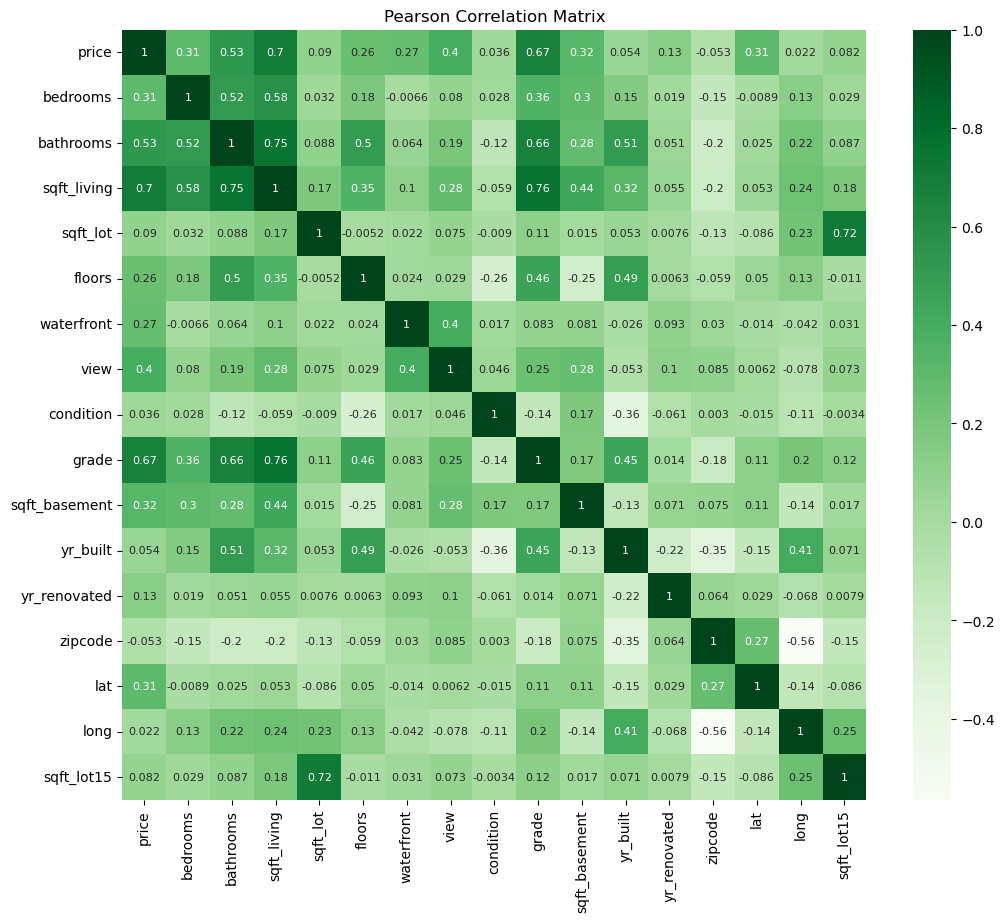

In [16]:
# Plot Pearson correlation matrix
fig_1 = plt.figure(figsize=(12, 10))
new_correlations = df.corr()
sns.heatmap(new_correlations, annot=True, cmap='Greens', annot_kws={'size': 8})
plt.title('Pearson Correlation Matrix')
plt.show()

In [17]:
# Determine the highest intercorrelations
highly_correlated_features = new_correlations[new_correlations > 0.75]
highly_correlated_features.fillna('-')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15
price,1.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
bedrooms,-,1.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
bathrooms,-,-,1.0,0.754665,-,-,-,-,-,-,-,-,-,-,-,-,-
sqft_living,-,-,0.754665,1.0,-,-,-,-,-,0.762704,-,-,-,-,-,-,-
sqft_lot,-,-,-,-,1.0,-,-,-,-,-,-,-,-,-,-,-,-
floors,-,-,-,-,-,1.0,-,-,-,-,-,-,-,-,-,-,-
waterfront,-,-,-,-,-,-,1.0,-,-,-,-,-,-,-,-,-,-
view,-,-,-,-,-,-,-,1.0,-,-,-,-,-,-,-,-,-
condition,-,-,-,-,-,-,-,-,1.0,-,-,-,-,-,-,-,-
grade,-,-,-,0.762704,-,-,-,-,-,1.0,-,-,-,-,-,-,-


In [18]:
# Remove features which are highly correlated with "sqft_living"
#df = df.drop(['sqft_above', 'sqft_living15'], axis=1)

In [19]:
# Update features and store their length
features = df.iloc[:, 1:].columns.tolist()
len_of_features = len(features)
len_of_features

# Display the first five observations
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045,7503


In [20]:
# Normalize the features
# Normalize the features
df.iloc[:, 1:] = (df.iloc[:, 1:] - df.iloc[:, 1:].mean())/df.iloc[:, 1:].std()

In [21]:
# Create X, y and theta
#XX = df.iloc[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:,0], test_size=0.2, random_state=42)
print(' x_train avant : ',X_train.shape)
print('y _train avant : ',y_train.shape)

#print('y_train avant : ',y_train.shape)
# Création de la matrice X, inclut le Biais
X = np.hstack((X_train, np.ones((X_train.shape[0], 1)))) # ajoute un vecteur Biais de dimension (x.shape[0], 1)
y = y_train.values.reshape((-1, 1))


print('x_train apres : ',X.shape)
print('y _train apres : ',y.shape)



 x_train avant :  (17290, 16)
y _train avant :  (17290,)
x_train apres :  (17290, 17)
y _train apres :  (17290, 1)


In [22]:
#y_train=y_train.values.reshape(17290,1)
#print(y_train.shape)

In [23]:
#y = df.iloc[:, 0:1].values
np.random.seed(0)
theta = np.random.randn(X.shape[1], 1)

In [24]:
def model(X, theta): # définir le modèle
    return X.dot(theta)

In [25]:
def cost_function(X, y, theta): #définir la fonction coût
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [26]:
cost_function(X, y, theta)

209919841560.8532

In [27]:
# définir la fonction de gradient
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [28]:
# Définir la descente de gradient
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [29]:
# Entrainement du modèle
n_iterations = 1000
learning_rate = 0.01

#theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)


In [30]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
X = np.hstack((X_test, np.ones((X_test.shape[0], 1)))) # ajoute un vecteur Biais de dimension (x.shape[0], 1)

predictions = model(X, theta_final)

theta_final

array([[-28212.02847629],
       [ 36177.57346277],
       [155881.82138241],
       [  2910.19823907],
       [  4566.37521845],
       [ 48567.06104328],
       [ 43120.24614565],
       [ 15609.60412106],
       [124432.36242691],
       [ -9860.1211162 ],
       [-80554.33559821],
       [  7893.8497446 ],
       [-29870.21580882],
       [ 82291.20558868],
       [-22644.3543867 ],
       [ -7149.51726699],
       [539378.36502954]])

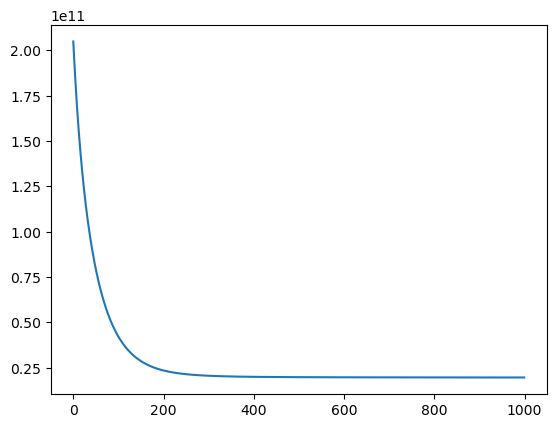

In [31]:
# Courbe d'apprentissage
plt.plot(range(n_iterations), cost_history)
plt.show()

In [32]:
# Evaluation du modèle
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [33]:
print(y_test.shape)
y_lst=y_test.values.reshape(y_test.shape[0],1)


coef_determination(y_lst, predictions)

(4323,)


0.699751260309827

In [34]:

str(predictions[4].round(2))

'[739262.04]'

In [35]:
str(y_lst[4].round(2))

'[711000.]'

In [36]:
str(predictions[4].round(2)-y_lst[4].round(2))

'[28262.04]'